In [1]:
from google.colab import drive
drive.mount('/content/drive')

file_path = ("/content/drive/MyDrive/titanic3.csv")

Mounted at /content/drive


In [7]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt


In [21]:
# Load the Titanic dataset
df = pd.read_csv(file_path)

# Preprocessing

# Convert categorical data to numeric
le = preprocessing.LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['embarked'] = le.fit_transform(df['embarked'].astype(str))

# Drop unnecessary columns
df.drop(['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'], axis=1, inplace=True)

# Fill missing values
df = df.fillna(df.mean())

# Normalization
x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=df.columns)

df['survived'] = df['survived'].apply(lambda x: round(x)).astype(int)

# Split the dataset
features = df.drop('survived', axis=1)
labels = df['survived']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Model Training
# Scikit-learn MLP
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(X_train, y_train)


# Keras DNN
input_dim = X_train.shape[1]  # Number of features in X_train

# Define the model
model = Sequential()
model.add(Dense(12, input_dim=input_dim, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=10)



Epoch 1/50
105/105 [==============================] - 1s 2ms/step - loss: 0.6905 - accuracy: 0.5172
Epoch 2/50
105/105 [==============================] - 0s 2ms/step - loss: 0.6499 - accuracy: 0.6317
Epoch 3/50
105/105 [==============================] - 0s 2ms/step - loss: 0.6229 - accuracy: 0.6298
Epoch 4/50
105/105 [==============================] - 0s 2ms/step - loss: 0.5957 - accuracy: 0.6422
Epoch 5/50
105/105 [==============================] - 0s 2ms/step - loss: 0.5601 - accuracy: 0.7500
Epoch 6/50
105/105 [==============================] - 0s 2ms/step - loss: 0.5211 - accuracy: 0.7958
Epoch 7/50
105/105 [==============================] - 0s 4ms/step - loss: 0.4969 - accuracy: 0.7882
Epoch 8/50
105/105 [==============================] - 0s 3ms/step - loss: 0.4867 - accuracy: 0.7853
Epoch 9/50
105/105 [==============================] - 0s 3ms/step - loss: 0.4758 - accuracy: 0.7901
Epoch 10/50
105/105 [==============================] - 0s 3ms/step - loss: 0.4705 - accuracy: 0.7882

9/9 [==============================] - 0s 6ms/step - loss: 0.4780 - accuracy: 0.7634


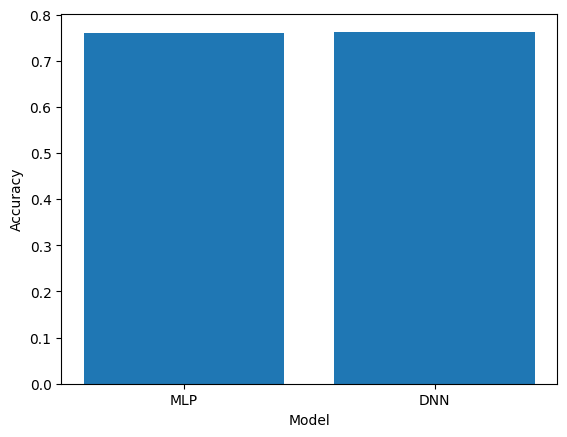

In [23]:
# Accuracy Calculation
predictions_mlp = mlp.predict(X_test)
accuracy_mlp = accuracy_score(y_test, predictions_mlp)

_, accuracy_dnn = model.evaluate(X_test, y_test)

# Plotting
plt.bar(['MLP', 'DNN'], [accuracy_mlp, accuracy_dnn])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()